<a href="https://colab.research.google.com/github/ucheokechukwu/ml_tensorflow_deeplearning/blob/main/02_neural_network_classification_with_tensorflow_multi_class_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiclass Classification

All `>=3` classes is multi-class

* Goal: build a neural network for multi-class classification.
* `fashion_mnist`
- https://github.com/zalandoresearch/fashion-mnist

- https://www.tensorflow.org/datasets/catalog/fashion_mnist

In [187]:
import tensorflow as tf
tf

<module 'tensorflow' from '/usr/local/lib/python3.8/dist-packages/tensorflow/__init__.py'>

In [189]:
from tensorflow.keras.datasets import fashion_mnist
#model_binary = tf.keras.models.load_model("/content/drive/MyDrive/ML_Tensor/binary_model.h5")

In [2]:
# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# Show the first trianing example
print(f"Training sample:\n {train_data[0]}\n")
print(f"Training label:\n {train_labels[0]}\n")

Training sample:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [4]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

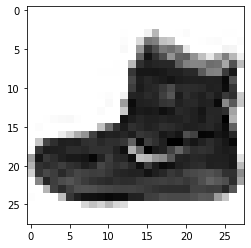

In [5]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0], cmap=plt.cm.binary)

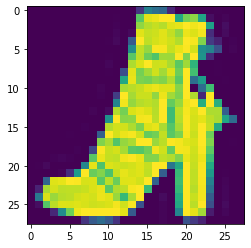

In [6]:
plt.imshow(train_data[11]);

In [7]:
train_labels[11]

9

In [8]:
# Make a list of the labels as text, not numbers

In [9]:
class_names = ["T-shirt/top",
               "Trouser",
               "Pullover",
               "Dress",
               "Coat",
               "Sandal",
               "Shirt",
               "Sneaker",
               "Bag",
               "Ankle boot"]
len(class_names)

10

In [10]:
def plot_image_label(index):
  plt.figure(figsize=(1,1))
  plt.imshow(train_data[index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[index]])

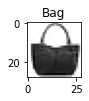

In [11]:
plot_image_label(100)

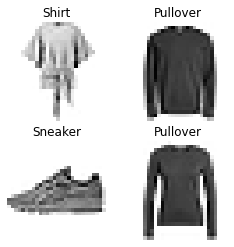

In [12]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(4,4))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  # picks a random number from the length of our training data
  rand_index = random.choice(range(len(train_data))) 
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)


## Building a multi-class classification model

For our multi-class classification model, we can use a similar architecture as the binary classificaiton but tweak a few things.

* Input shape = 28 x 28
* Output shape = 10 for 10 classes
* Loss function = `tf.keras.losses.CategoricalCrossentropy()`
* Output layer activation = `softmax`

In [13]:
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax") # or tf.keras.activations.softmax()
])

model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(), # or "categorical_crossentropy"
                optimizer="Adam",
                metrics="accuracy")

In [14]:
# non_norm_history = model_1.fit(train_data, 
#                                train_labels, 
#                                epochs=10, 
#                                validation_data=(test_data, test_labels))

# This is not going to work because the input shape needs to be flattened.

In [15]:
flatten_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28))
])
flatten_model.output_shape

(None, 784)

In [16]:
28 * 28

784

In [25]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
model_2.compile(loss="categorical_crossentropy",
                optimizer="adam",
                metrics="accuracy")

In [26]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 4)                 3140      
                                                                 
 dense_13 (Dense)            (None, 4)                 20        
                                                                 
 dense_14 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [28]:
# model_2.fit(train_data, train_labels, epochs=1)
# This will not work. 

* since our labels are in integer form, we'll use `tf.keras.losses.SparseCategoricalCrossentropy()`, if our labels were one-hot encoded (e.g. they looked something like `[0, 0, 1, 0, 0...]`), we'd use tf.keras.losses.CategoricalCrossentropy().

In [20]:
tf.random.set_seed(42)

In [29]:


model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
model_3.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy"
)
model_3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 4)                 3140      
                                                                 
 dense_16 (Dense)            (None, 4)                 20        
                                                                 
 dense_17 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [31]:
non_norm_history = model_3.fit(train_data, 
                               train_labels, 
                               epochs=10, 
                               validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 2ms/step - loss: 2.3461 - accuracy: 0.0989 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0993 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3029 - accuracy: 0.1003 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

In [65]:
# Recreating for one-hot labels

#train_label_one_hot = tf.one_hot(train_labels, depth=10)

tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
model_4.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

In [66]:
model_4.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_36 (Dense)            (None, 4)                 3140      
                                                                 
 dense_37 (Dense)            (None, 4)                 20        
                                                                 
 dense_38 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [67]:
onehot_test = tf.one_hot(test_labels, depth=10)

In [68]:
non_norm_history = model_4.fit(train_data,
            tf.one_hot(train_labels, depth=10),
            epochs=10,
            validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3354 - accuracy: 0.0986 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

In [54]:
# Check the model summary:
model_4.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_27 (Dense)            (None, 4)                 3140      
                                                                 
 dense_28 (Dense)            (None, 4)                 20        
                                                                 
 dense_29 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [57]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

* Neural networks prefer data to be scaled (or normalized) i.e. the numbers in the tensors should be between 0 & 1
* We can get our training and testing data between 0 and 1 by dividing by the max.

In [58]:
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

# check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [70]:
# Using exactly the same model
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="sigmoid"),
])

model_5.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy"
)



In [71]:
norm_history = model_5.fit(train_data_norm,
                           train_labels,
                           epochs=10,
                           validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.2458 - accuracy: 0.5378 - val_loss: 0.8939 - val_accuracy: 0.6587
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8026 - accuracy: 0.7038 - val_loss: 0.7988 - val_accuracy: 0.7210
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7273 - accuracy: 0.7368 - val_loss: 0.7562 - val_accuracy: 0.7131
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6766 - accuracy: 0.7578 - val_loss: 0.6859 - val_accuracy: 0.7496
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6444 - accuracy: 0.7683 - val_loss: 0.6808 - val_accuracy: 0.7629
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6256 - accuracy: 0.7720 - val_loss: 0.6729 - val_accuracy: 0.7516
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6144 - accuracy: 0.7742 - val_loss: 0.6622 - val_accuracy:

##### 🔑 Note:
Neural networks tend to prefer data in numerical form as well as scaled/normalized.

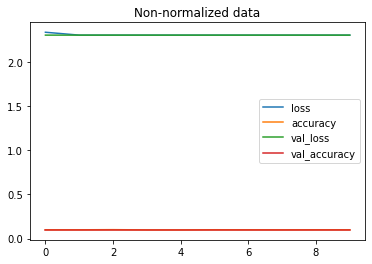

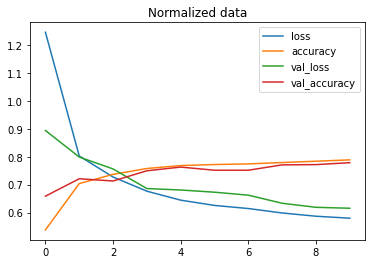

In [72]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

##### 🔑 Note: 
The same model with even slightly different data can produce dramatically different results.
When comparing models, compare them on the same criteria i.e. compare them in as small variable as possible.

## Finding the ideal learning rate

In [73]:
tf.random.set_seed(42)
model_6 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
model_6.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epoch/20))

In [75]:
model_6_history = model_6.fit(train_data_norm,
                              train_labels,
                              epochs=40,
                              validation_data = (test_data_norm, test_labels),
                              callbacks=lr_scheduler)

Epoch 1/40
1875/1875 [==============================] - 7s 3ms/step - loss: 1.3367 - accuracy: 0.4931 - val_loss: 0.9355 - val_accuracy: 0.6458 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7894 - accuracy: 0.7114 - val_loss: 0.7078 - val_accuracy: 0.7427 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6607 - accuracy: 0.7602 - val_loss: 0.6625 - val_accuracy: 0.7645 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6098 - accuracy: 0.7757 - val_loss: 0.6189 - val_accuracy: 0.7750 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5883 - accuracy: 0.7836 - val_loss: 0.6026 - val_accuracy: 0.7825 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5793 - accuracy: 0.7868 - val_loss: 0.5964 - val_accuracy: 0.7871 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 7

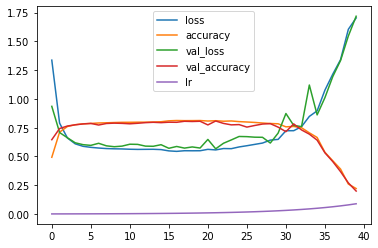

In [76]:
pd.DataFrame(model_6_history.history).plot(title="")

Text(0.5, 1.0, 'Finding The Ideal Learning Rate')

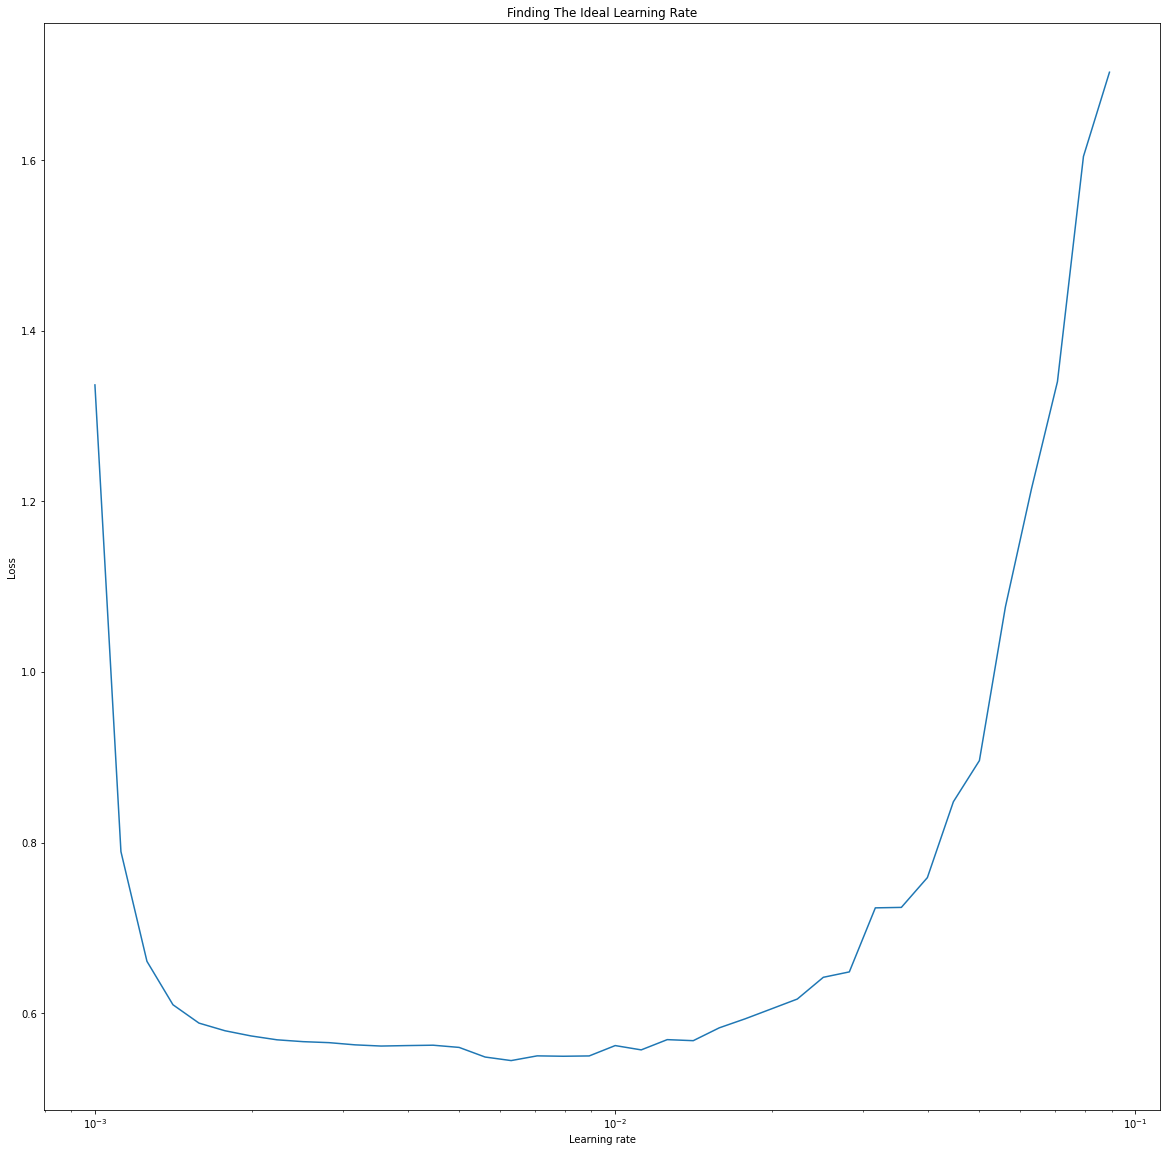

In [81]:
import numpy as np
lrs = 1e-3*(10**(tf.range(40)/20))
plt.figure(figsize=(20,20))
plt.semilogx(lrs, model_6_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding The Ideal Learning Rate")

* Based on my observation, the sharpest slope just before the minimum value of loss is 0.00105

In [82]:
# Let's refit the model with the ideal learning rate

tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="sigmoid"),
])

model_7.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00105),
                metrics = "accuracy")



In [83]:
history_7 = model_7.fit(train_data_norm, train_labels, epochs=20,
                        validation_data = (test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 1.3546 - accuracy: 0.4881 - val_loss: 0.9931 - val_accuracy: 0.6278
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8624 - accuracy: 0.6796 - val_loss: 0.7720 - val_accuracy: 0.7327
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7107 - accuracy: 0.7464 - val_loss: 0.7154 - val_accuracy: 0.7479
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6678 - accuracy: 0.7580 - val_loss: 0.6936 - val_accuracy: 0.7586
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6445 - accuracy: 0.7696 - val_loss: 0.6626 - val_accuracy: 0.7679
Epoch 6/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6285 - accuracy: 0.7754 - val_loss: 0.6553 - val_accuracy: 0.7732
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6175 - accuracy: 0.7802 - val_loss: 0.6636 - val_accuracy:

## Evaluating our multi-class classification model

* Using other classification metrics (e.g. confusion matrix)
* Assess predictions via visualizations
* Improve results - more epochs, different architecture
* Save and export for use in application

In [127]:
# Importing the plot_confusion_matrix from previous notebook....
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix (y_true, y_preds, 
                           classes=None, 
                           figsize=(10,10),
                           text_size=15):
  '''
  Plots the confusion matrix into a color-coded graph form
  '''

  # Create and normalize the confusion matrix
  cm = confusion_matrix(y_true, y_preds)
  cm_norm = cm.astype("float")/cm.sum(axis=1)[:np.newaxis] # normalizes the confusion matrix
  n_classes = cm.shape[0] # counts the number of classes, this is binary so it's 2.

  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # matshow displays an array as a matrix in a new figure window
  # plt.cm is plt.COLORMAP, not related to cm confusion matrix
  fig.colorbar(cax)

  # The labels are a range of the confusion matrix shape, in this case 2 because it's binary
  # If there were a list of classes, the labels would be each class
  if classes:
    labels = classes
  else: 
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis label to the bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust the label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min())/2

  # Plot text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i,j] > threshold else "black",
            size=text_size
            )



In [91]:
y_probs = model_7.predict(test_data_norm)

313/313 [==============================] - 2s 5ms/step


In [ ]:
y_probs[:5]

In [104]:
# Convert all the probabilities into integers: 
y_preds = y_probs.argmax(axis=1)

In [105]:
y_preds[:5]

array([9, 2, 1, 1, 6])

In [106]:
y_preds

array([9, 2, 1, ..., 8, 1, 5])

In [107]:
y_preds.shape

(10000,)

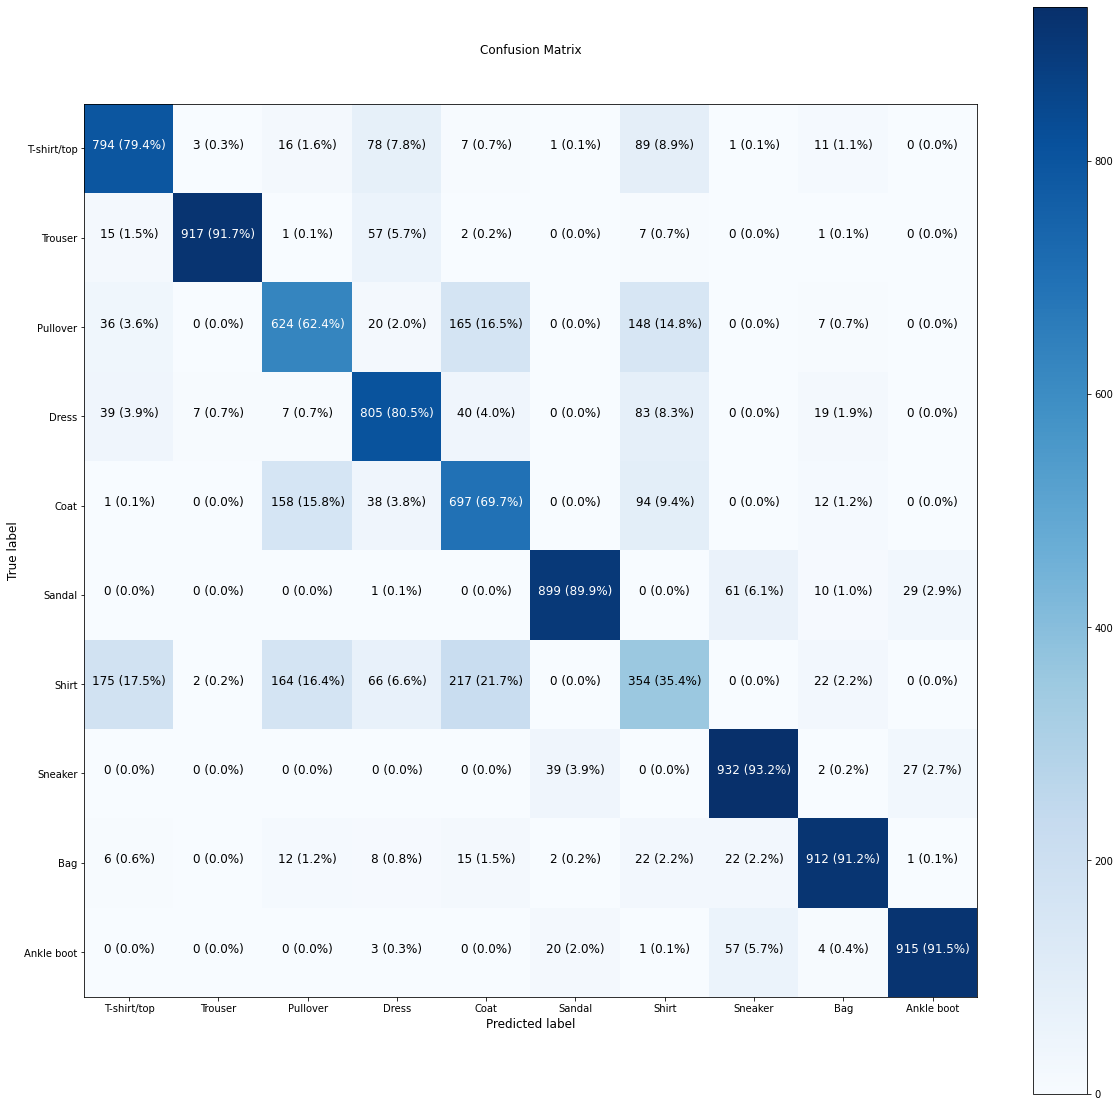

In [139]:
plot_confusion_matrix (test_labels, y_preds, 
                       classes=class_names,
                       figsize=(20,20),
                       text_size=12)

#### 🔑 Note:
When working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of your model.

How about we create a fun little function:
* plot a random image
* make a prediction of the said image
* label the plot with the truth label and the predicted label

In [152]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with predition and truth label
  """
  # set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # plot the image
  plt.figure(figsize=(3,3))
  plt.imshow(target_image, cmap=plt.cm.binary)

  # change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # add xlabel information (prediciton/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color)

1/1 [==============================] - 0s 46ms/step


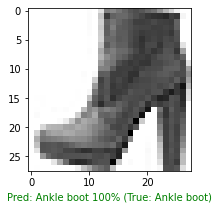

In [169]:
plot_random_image(model=model_7, 
                  images=test_data_norm, 
                  true_labels=test_labels, 
                  classes=class_names)

In [147]:
test_labels[10]

4

## What patterns are our model learning?

In [171]:
# Find the layers in our current model
model_7.layers

In [174]:
# Extract a particular layer
model_7.layers[1]

In [175]:
# Get the patterns of a layer in our network
weights, biases = model_7.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 0.41801718,  0.21002707, -0.01146343, -0.17094669],
        [-0.07600109, -0.16898163,  0.06194523, -0.6435998 ],
        [ 0.56156754, -1.5230294 ,  0.07975634,  0.05863386],
        ...,
        [-0.45358098, -0.3899678 ,  0.00869198,  0.00212138],
        [-0.15850592,  0.1516671 , -0.03011532, -0.16611929],
        [ 0.1394836 , -0.07989454, -0.02751519, -0.21075001]],
       dtype=float32), (784, 4))

In [176]:
biases

array([-0.09750585,  2.1623046 , -0.01730779,  1.1044297 ], dtype=float32)

In [177]:
model_7.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_16 (Flatten)        (None, 784)               0         
                                                                 
 dense_48 (Dense)            (None, 4)                 3140      
                                                                 
 dense_49 (Dense)            (None, 4)                 20        
                                                                 
 dense_50 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


* For each data point in our input tensor, our weight matrix has **4** numbers that it starts to learn and adjust to find patterns in these **784** numbers.

`kernel_initializer` is part of the `.dense` method that initializes the weights with random values at the initialization of the model

In [178]:
# Now let's check out the bias vector
biases, biases.shape

(array([-0.09750585,  2.1623046 , -0.01730779,  1.1044297 ], dtype=float32),
 (4,))

* Every neuron has a bias vector. Each of this is paired with the weight matrix. The bias is initialized as zeros (at least in the case of a tensorflow `dense` layer.)
* The bias vector dictates how much the patterns within the the correpsonding weight matrix shoudl influence the next layer.

In [179]:
model_7.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_16 (Flatten)        (None, 784)               0         
                                                                 
 dense_48 (Dense)            (None, 4)                 3140      
                                                                 
 dense_49 (Dense)            (None, 4)                 20        
                                                                 
 dense_50 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


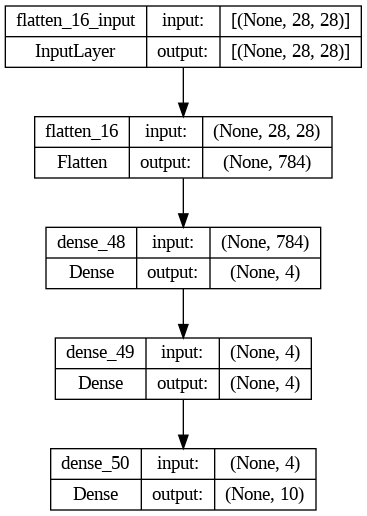

In [191]:
# Let's check out another way of videwing our deep learning models...
from tensorflow.keras.utils import plot_model

plot_model(model_7, show_shapes=True)
# 'None' stands for batch size